In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os 
import sys 
sys.path.append('../../..')
sys.path
os.environ['DATA_DIR'] = '/home/hhansen/DecontextEmbeddings/data'

from helpers.data import load_embedding_to_df
from helpers.plot import set_style_and_font_size
set_style_and_font_size()

In [2]:
def missing_wordsim(df):
    words = set(pd.read_csv(f'{os.environ.get('DATA_DIR'))}/vocabulary/word_sim_vocabulary.csv', header=None, names=['words'])['words'])
    missing = words.difference(set(df['word']))
    print(f'{len(missing)} missing of {len(words)}')

def stats_wordsim(corpus_folder):
    path = f'{os.environ.get('DATA_DIR'))}/embeddings/data/word_sim/{corpus_folder}/decontext/bert-base/0/word/mean/1/decontext.txt'
    df = load_embedding_to_df(path, 'word')#[['word', 'n_contexts']]
    df = df.sort_values(by='n_contexts', ascending=False)
    df.head(30)
    total = df['n_contexts'].sum()
    print(f'Total number of embeddings: {total}')
    print(f'{df.shape[0]} concepts found')
    print(df['n_contexts'].describe())
    missing_wordsim(df)
    return df

In [3]:
def plot_hist_wordsim(df):
    fig, axes = plt.subplots(1,1, figsize=(10, 4))
    axes.hist(df['n_contexts'], bins=200)
    axes.set_xlabel('number of contexts')
    axes.set_ylabel('number of words')

def plot_boxplot_wordsim(df):
    fig, axes = plt.subplots(1,1, figsize=(11.69,3), sharey=True, sharex=True)
    axes.boxplot(df['n_contexts'], vert=False)
    axes.set_xlabel('number of contexts')

# Wikidumps

In [4]:
df = stats_wordsim('wikidumps')

Total number of embeddings: 1517491
1323 concepts found
count    1323.000000
mean     1147.007559
std       178.045698
min        38.000000
25%      1015.000000
50%      1126.000000
75%      1255.500000
max      2258.000000
Name: n_contexts, dtype: float64
18 missing of 1341


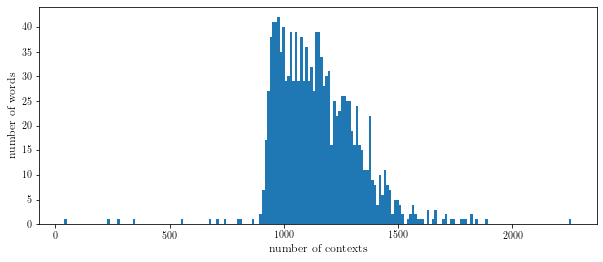

In [5]:
plot_hist_wordsim(df)
plt.savefig(f'wikidumps_hist.pdf', bbox_inches='tight')


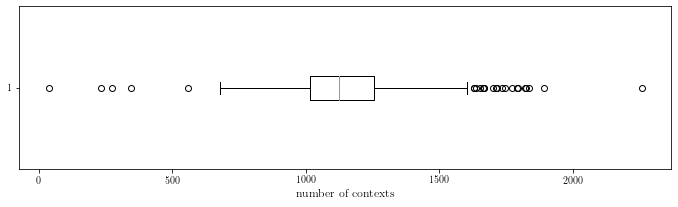

In [6]:
plot_boxplot_wordsim(df)
plt.savefig(f'wikidumps_boxplot.pdf', bbox_inches='tight')
